In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import time
import operator
import re

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
df = pd.read_csv('data10/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [4]:
df.isna().sum()

create_date      0
price            0
text             0
phone_model      0
factory_price    0
maker            0
price_index      0
dtype: int64

### date 피처 확인

In [5]:
df['create_date']

0        2017-03-19  4 35 00 PM
1       2016-10-26  12 08 00 PM
2       2016-10-25  12 52 00 PM
3       2017-03-23  11 14 00 PM
4        2016-04-11  7 35 00 PM
                 ...           
4946    2016-10-10  11 29 00 AM
4947    2016-10-24  10 03 00 PM
4948    2016-09-19  10 15 00 AM
4949    2016-10-05  12 22 00 AM
4950    2016-09-26  11 37 00 AM
Name: create_date, Length: 4951, dtype: object

In [6]:
# 월까지만 가져온다.
df['month'] = df['create_date'].apply(lambda x : x[:7])
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

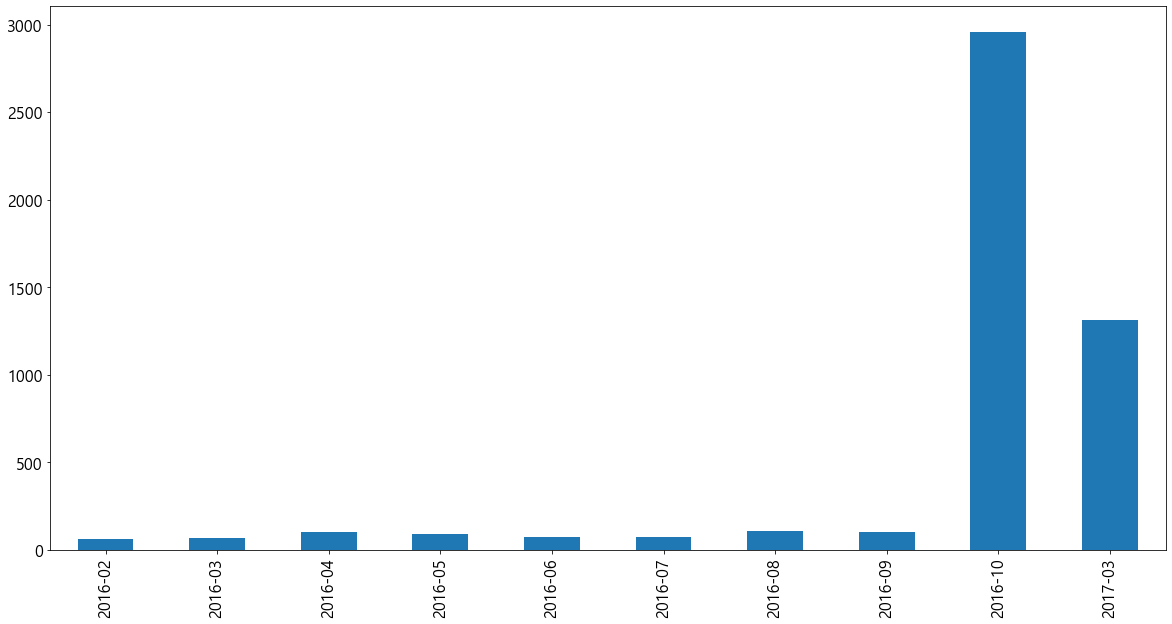

In [7]:
# 월별 거래량을 시각화한다.
a1 = df['month'].value_counts()
a1.sort_index(inplace=True)
a1.plot.bar()
plt.show()

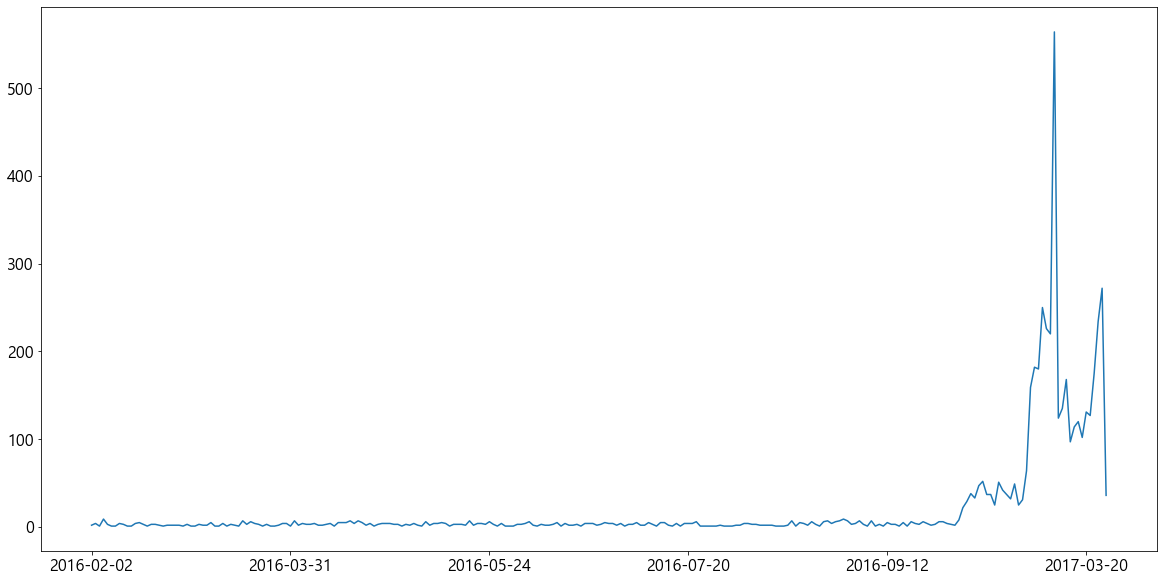

In [8]:
# 일별 거래 횟수를 계산하여 그래프로 시각화한다.
df_day = df['create_date'].apply(lambda x : x[:10])
a1 = df_day.value_counts()
a1.sort_index(inplace=True)
a1.plot()
plt.show()

### 가격 피처 탐색

<AxesSubplot:>

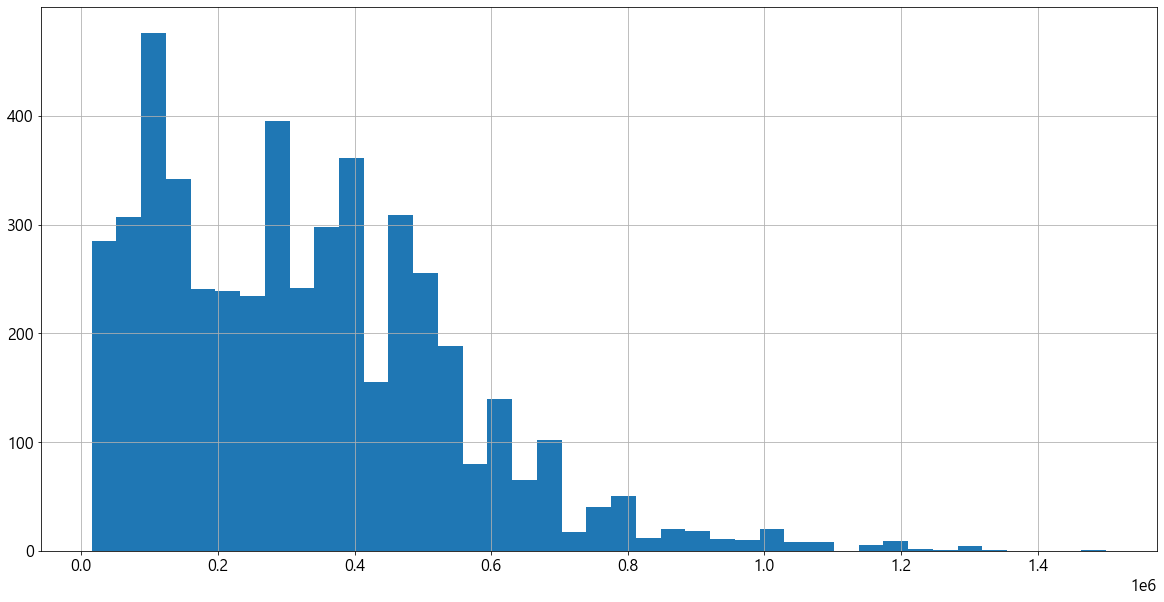

In [9]:
# 가격의 분포를 확인한다.
df['price'].hist(bins='auto')

In [10]:
# 핸드폰 기종(phone_model)별 가격의 평균과 표준편차를 구한다.
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x : np.mean(x))
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x : np.std(x))

print(df_price_model_mean)
print('-----------------')
print(df_price_model_std)

0       4.545240e+05
1       2.972500e+05
2       2.346903e+05
3       3.300745e+05
4       1.279354e+05
            ...     
4946    1.067273e+06
4947    1.072353e+06
4948    1.072353e+06
4949    1.067273e+06
4950    8.010000e+05
Name: price, Length: 4951, dtype: float64
-----------------
0       136082.920405
1        63678.391154
2        55507.645913
3       120779.331875
4       149124.347567
            ...      
4946    189932.567416
4947    172235.454838
4948    172235.454838
4949    189932.567416
4950    214312.331145
Name: price, Length: 4951, dtype: float64


<AxesSubplot:>

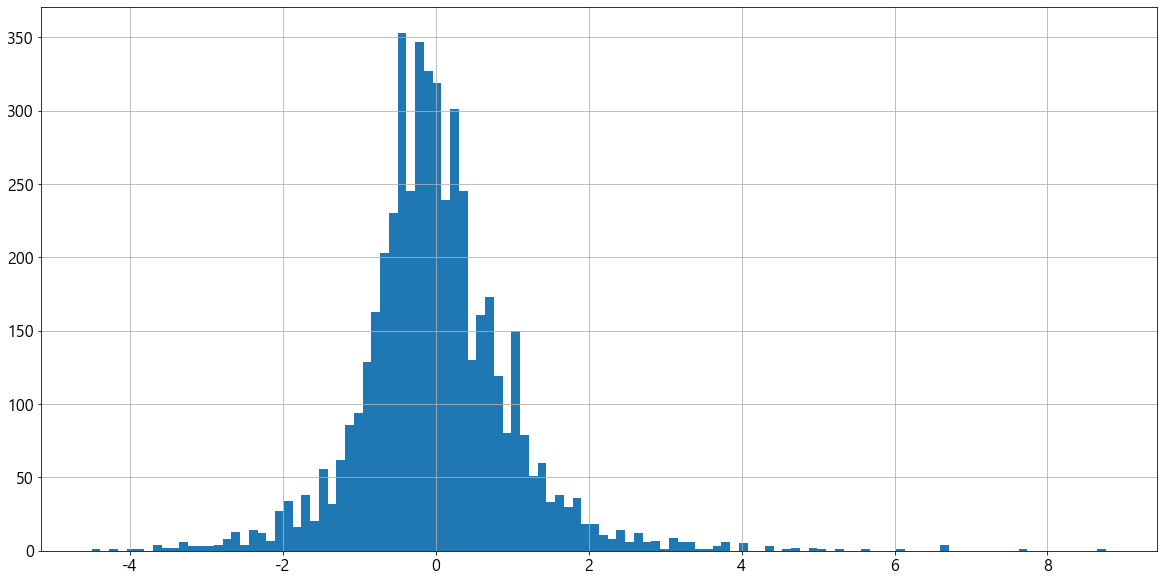

In [11]:
# 위에서 구한 평균과 표준 편차를 이용해 z-score를 구한다.
# 해당 데이터의 가격이 기종별 평균에 비해 어느정도 높거나 낮은지를 알 수 있게 
# 한다.
df_price_model_z_score = (df['price'] - df_price_model_mean) / df_price_model_std
df_price_model_z_score.hist(bins='auto')

### 출고가 피처 탐색

<AxesSubplot:>

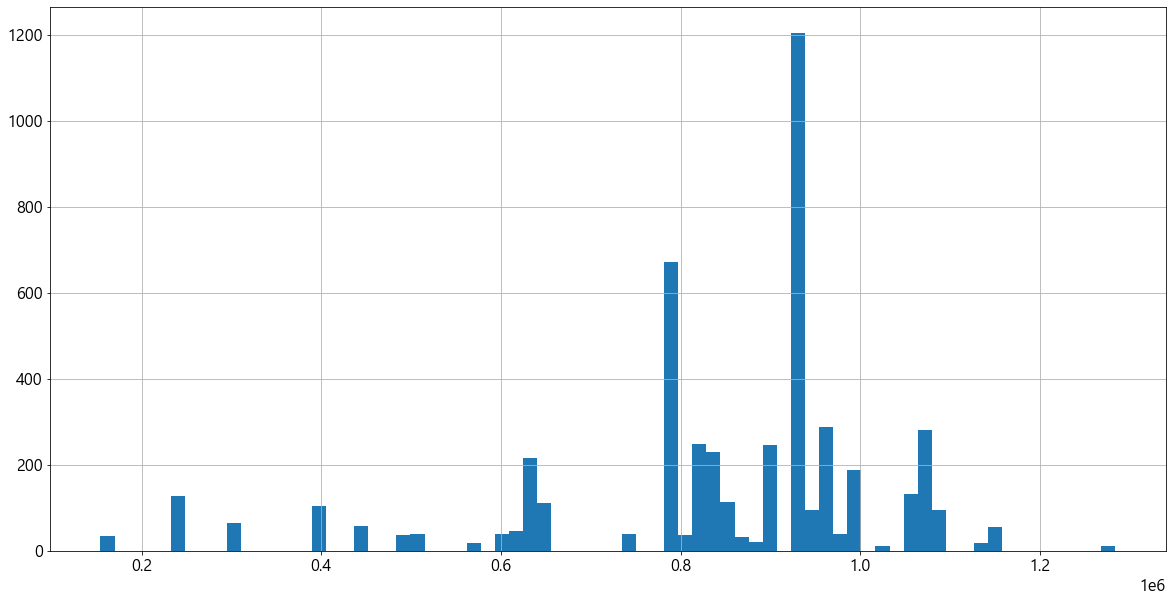

In [12]:
# 출고가의 분포를 확인한다.
df['factory_price'].hist(bins='auto')

<AxesSubplot:xlabel='factory_price', ylabel='price'>

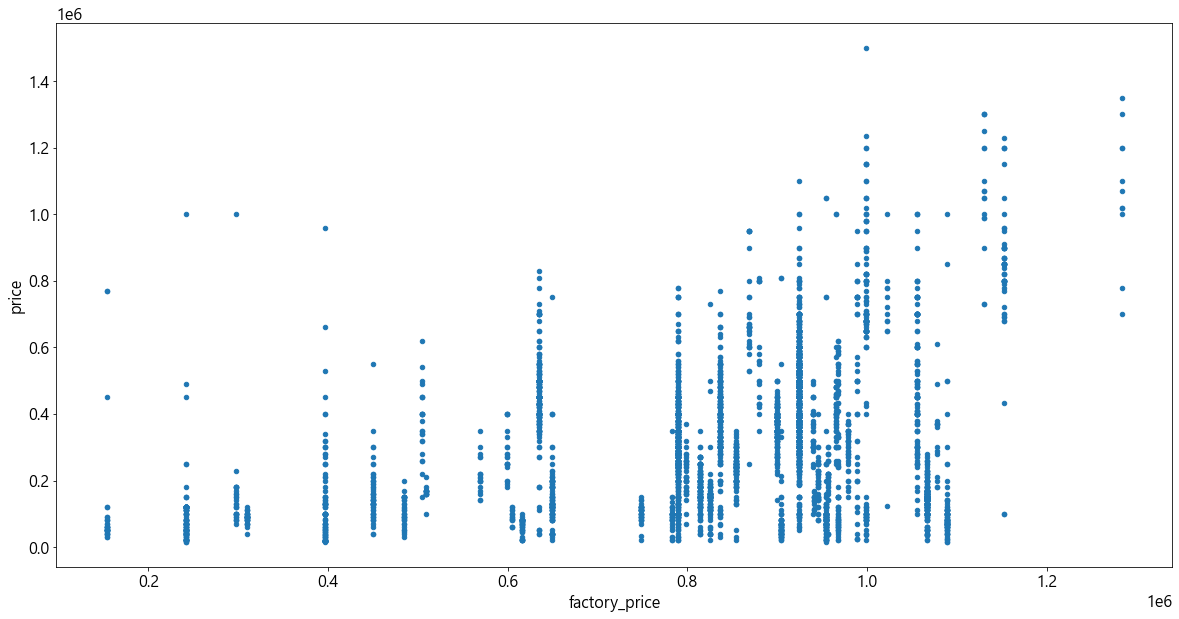

In [13]:
# 출고가와 중고가격 피처를 산점도로 시각화여 상관관계를 살펴본다.
df.plot.scatter(x='factory_price', y='price')

출고가가 높으면 중고가도 높게 형성된다.

### 핸드폰 모델 피처 탐색

In [14]:
# 기종별 데이터 개수를 집계한다.
model_counts = df['phone_model'].value_counts()
model_counts

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 6s Plus 16gb      12
iphone 7 plus 32gb       12
iphone 4s 16gb           11
iphone 7 plus 256gb      11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64

In [15]:
# 요약 통계 정보
model_counts.describe()

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21114110640>,
 'caps': [<matplotlib.lines.Line2D at 0x21114110d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x211141102e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2111411a400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2111411a760>],
 'means': []}

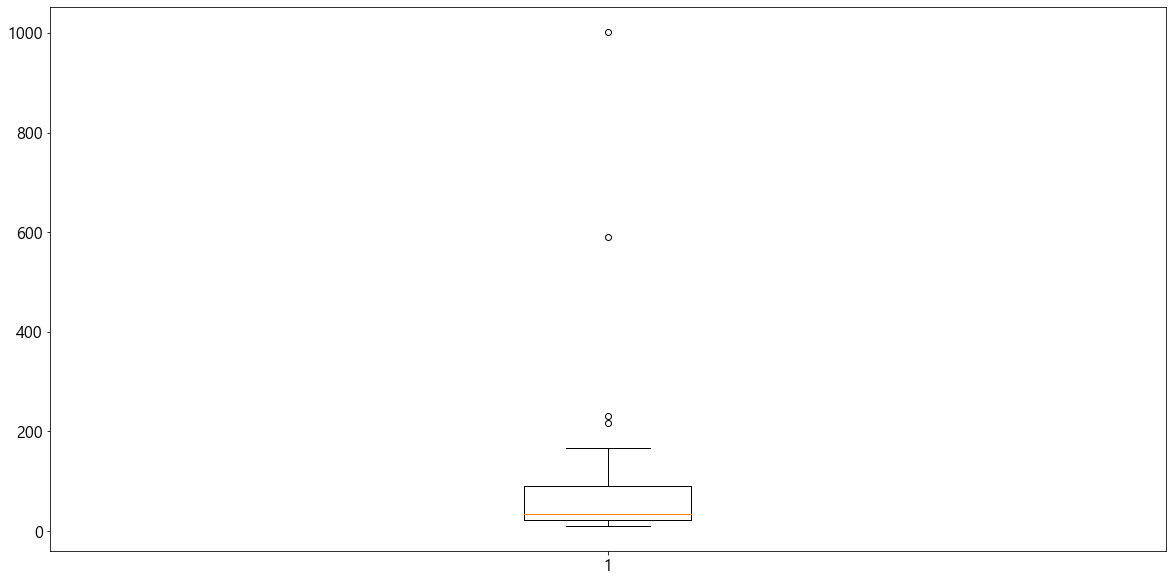

In [16]:
plt.boxplot(model_counts)

### 제조사 피처 탐색

In [17]:
maker_counts = df['maker'].value_counts()
maker_counts

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x211146e7e80>,
 'caps': [<matplotlib.lines.Line2D at 0x211146f4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x211146e7b20>],
 'medians': [<matplotlib.lines.Line2D at 0x211146f4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x211146f4fa0>],
 'means': []}

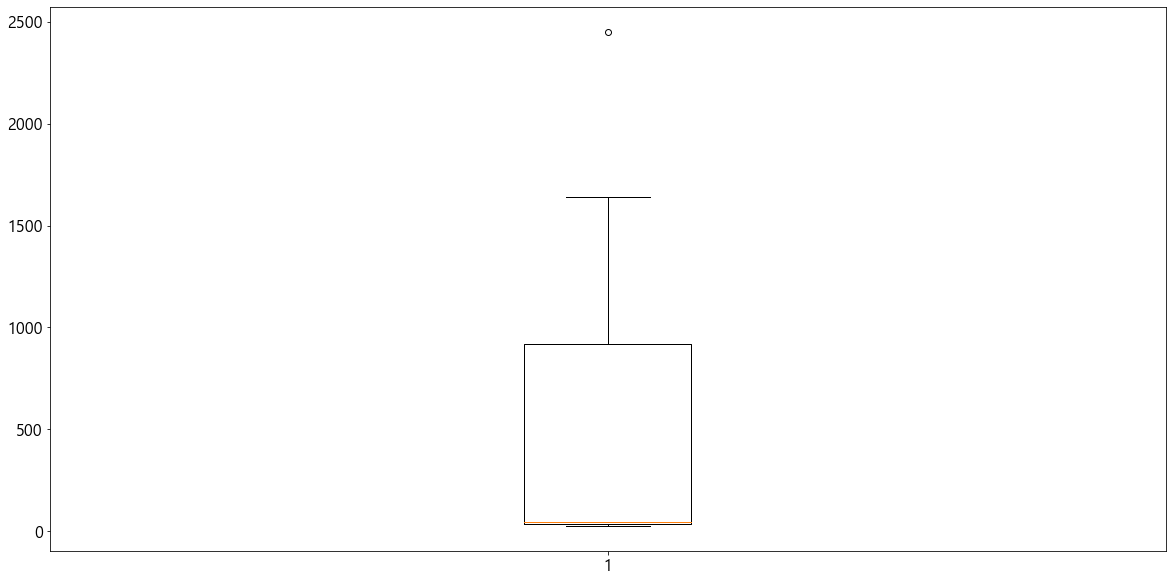

In [18]:
plt.boxplot(maker_counts)

### 물가 피처

In [19]:
df['price_index'].value_counts()

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

### 가격 예측

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [21]:
# 데이터 준비
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 
         'month']]
df

,price,phone_model,factory_price,maker,price_index,month
0,550000.0,iphone 6 64gb,924000,apple,95.96,2017-03
1,380000.0,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,300000.0,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,290000.0,lg g5 32gb,836000,lg,95.96,2017-03
4,280000.0,lg u 32gb,396000,lg,102.59,2016-04
...,...,...,...,...,...,...
4946,1300000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10
4947,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-10
4948,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-09
4949,1350000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10


In [22]:
# 문자열 컬럼을 원-핫 인코딩해준다.
df = pd.get_dummies(df, columns=['phone_model', 'maker', 'month'])
df

,price,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,...,month_2016-02,month_2016-03,month_2016-04,month_2016-05,month_2016-06,month_2016-07,month_2016-08,month_2016-09,month_2016-10,month_2017-03
0,550000.0,924000,95.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,380000.0,979000,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,300000.0,854000,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,290000.0,836000,95.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,280000.0,396000,102.59,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1300000.0,1283700,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4947,1300000.0,1130800,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4948,1300000.0,1130800,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4949,1350000.0,1283700,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# 입력과 결과로 나눈다.
X = df.drop('price', axis=1)
y = df['price']
display(X)
display(y)

,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,phone_model_galaxy grand max 16gb,...,month_2016-02,month_2016-03,month_2016-04,month_2016-05,month_2016-06,month_2016-07,month_2016-08,month_2016-09,month_2016-10,month_2017-03
0,924000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,979000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,854000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,836000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,396000,102.59,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1283700,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4947,1130800,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4948,1130800,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4949,1283700,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


0        550000.0
1        380000.0
2        300000.0
3        290000.0
4        280000.0
          ...    
4946    1300000.0
4947    1300000.0
4948    1300000.0
4949    1350000.0
4950    1500000.0
Name: price, Length: 4951, dtype: float64

In [24]:
# 학습과 검증용으로 나눈다.
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
# 교차 검증
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# 폴드 생성
kfold = KFold(n_splits=20, shuffle=True, random_state=1)

# 하이퍼 파라미터 튜닝
params = {
    # 트리의 개수
    'n_estimators' : [10, 50, 100, 150, 200],
    # 질문 깊이
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# 모델 생성
model = XGBRegressor(silent=True, verbosity=0, tree_method='gpu_hist')

# 하이퍼파라미터 튜닝
grid = GridSearchCV(model, param_grid=params, scoring='r2', cv=kfold)
grid.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
print(f'최적의 모델 평균 성능 : {grid.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7073796985025013


In [26]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 추출한다.
best_model = grid.best_estimator_
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
             subsample=1, tree_method='gpu_hist', validate_parameters=1,
             verbosity=0)

In [27]:
# 교차검증
result = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=kfold)
result

array([0.69494793, 0.70096764, 0.79294216, 0.80887066, 0.76368625,
       0.75108901, 0.78004742, 0.69193369, 0.5845796 , 0.59681522,
       0.71042007, 0.73535245, 0.61463165, 0.7377358 , 0.64287159,
       0.82641276, 0.64567273, 0.62787847, 0.72551647, 0.71522241])

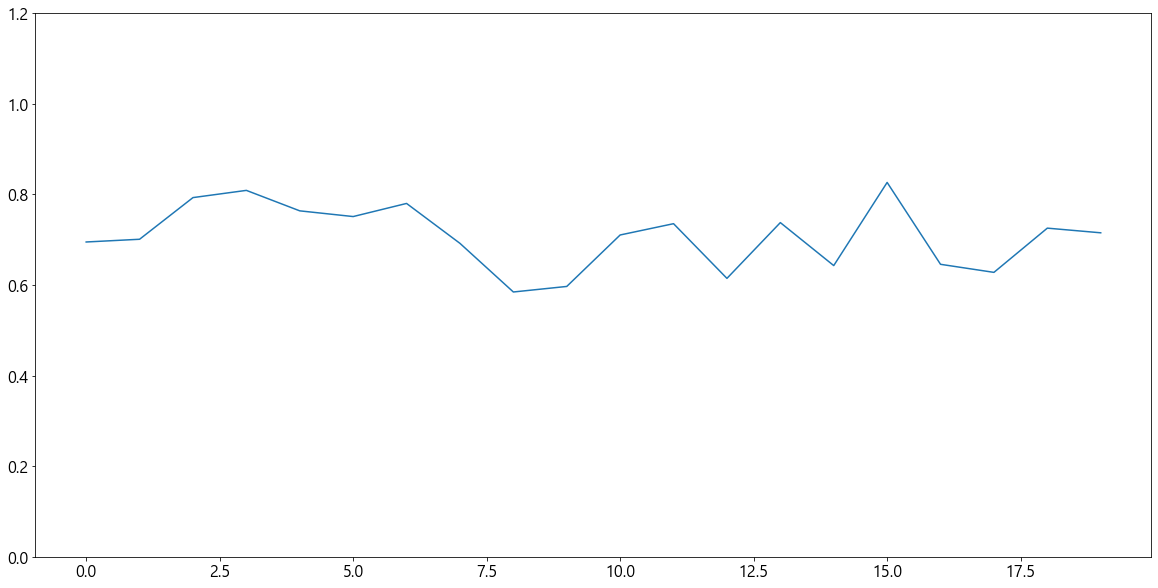

In [28]:
plt.plot(result)
plt.ylim(0, 1.2)
plt.show()

In [29]:
# 예측 결과를 추출해서 평가한다.
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(x_test)

In [30]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

11555117568.011106
12208764813.870752
0.7566596627580917
0.7349121070193596


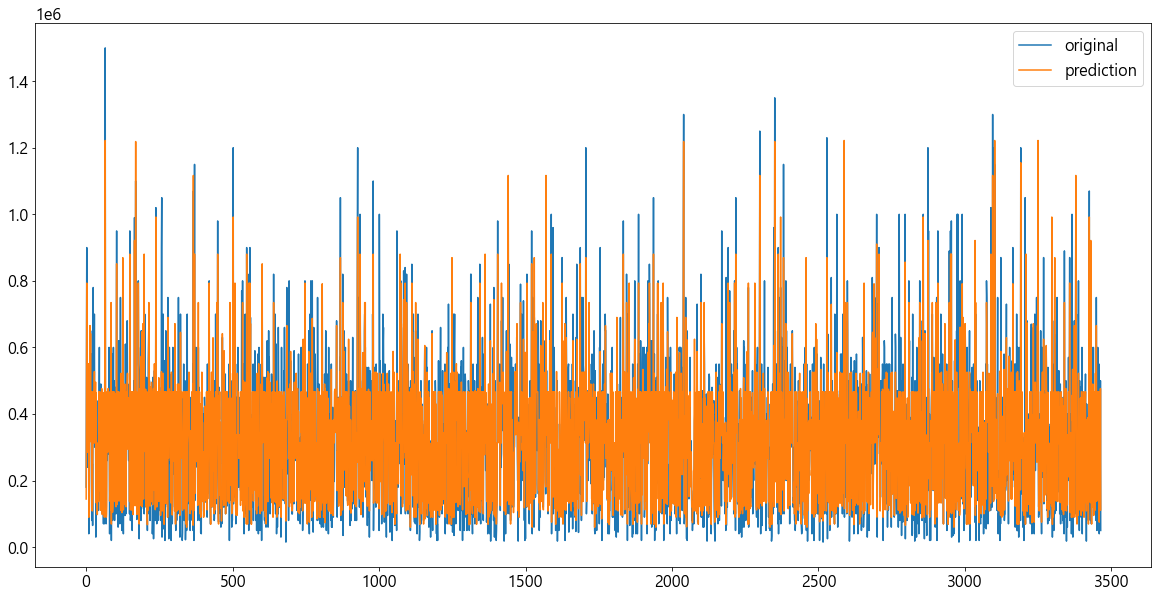

In [31]:
plt.plot(y_train.values, label='original')
plt.plot(y_train_pred, label='prediction')
plt.legend()
plt.show()

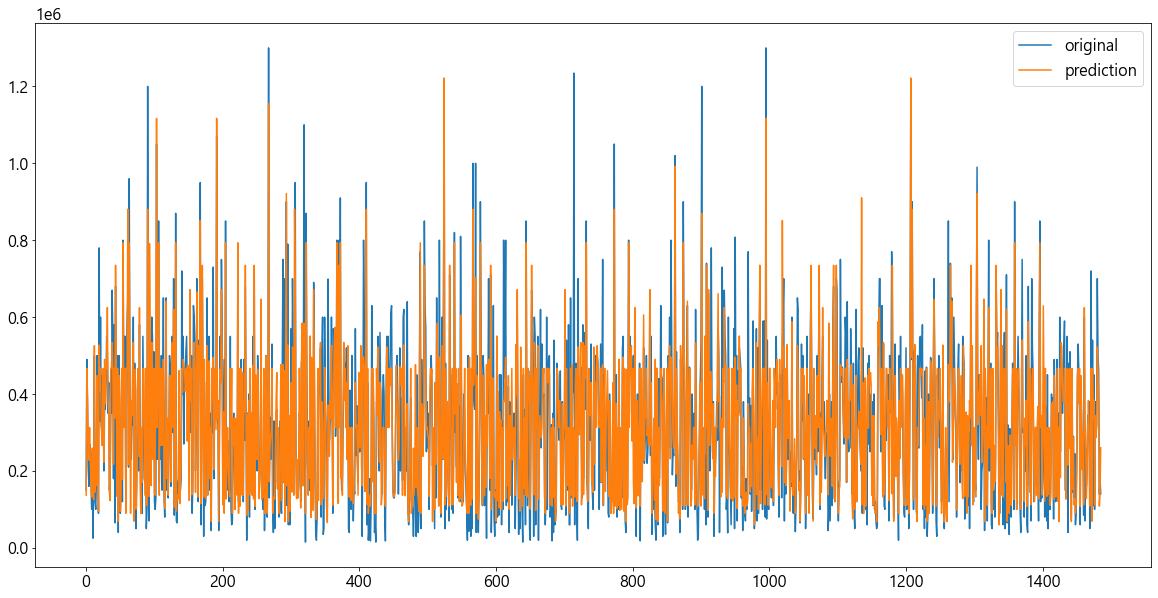

In [32]:
plt.plot(y_test.values, label='original')
plt.plot(y_test_pred, label='prediction')
plt.legend()
plt.show()

### 피처 엔지니어링

### 데이터 읽어오기

In [33]:
df = pd.read_csv('data10/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


### create_date

In [34]:
from datetime import datetime
import time

In [35]:
# create_date 데이터를 수치적으로 환산하기 위해 unixtime(1970년 1월 1일 0시 0분
# 0초를 0으로 잡고 1ms 마다 1씩 증가시킨 값) 으로 변환한다.
def date_to_unixtime(date_str) :
    a1 = datetime.strptime(date_str, '%Y-%m-%d').timetuple()
    timestamp = time.mktime(a1)
    return timestamp

# 시간값을 모두 unixtime으로 변경한다.
df['create_unixtime'] = df['create_date'].apply(lambda x : date_to_unixtime(x[:10]))
df['create_unixtime']

0       1.489849e+09
1       1.477408e+09
2       1.477321e+09
3       1.490195e+09
4       1.460300e+09
            ...     
4946    1.476025e+09
4947    1.477235e+09
4948    1.474211e+09
4949    1.475593e+09
4950    1.474816e+09
Name: create_unixtime, Length: 4951, dtype: float64

In [36]:
# unixtime을 min-max 스케일링 작업을 한다
# 최소를 0으로 최대를 1로 맞추는 작업
min1 = df['create_unixtime'].min()
max1 = df['create_unixtime'].max()

df['create_time_score'] = ((df['create_unixtime'] - min1) / (max1 - min1))
df[['create_date', 'create_unixtime', 'create_time_score']]

,create_date,create_unixtime,create_time_score
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468
...,...,...,...
4946,2016-10-10 11 29 00 AM,1.476025e+09,0.601918
4947,2016-10-24 10 03 00 PM,1.477235e+09,0.635492
4948,2016-09-19 10 15 00 AM,1.474211e+09,0.551559
4949,2016-10-05 12 22 00 AM,1.475593e+09,0.589928


### phone_model

In [37]:
# 확인해보면 폰 모델에 전부 용량이 붙어있다.
df['phone_model'].value_counts().index

Index(['iphone 6 64gb', 'iphone 6 16gb', 'galaxy note3 32gb', 'iphone se 64gb',
       'galaxy note5 32gb', 'iphone 5s 16gb', 'wine smart jazz 4gb',
       'lg g5 32gb', 'galaxy s6 32gb', 'galaxy s7 32gb', 'iphone 6 128gb',
       'galaxy s4 32gb', 'galaxy s7 edge 32gb', 'lg u 32gb',
       'galaxy note 2 32gb', 'g4 32gb', 'iphone 7 128gb', 'galaxy s3 3g 8gb',
       'g3 cat.6 32gb', 'galaxy s6 64gb', 'galaxy note4 32gb',
       'galaxy note5 64gb', 'iphone 7 plus 128gb', 'optimus g 32gb',
       'lg g2 32gb', 'galaxy note7 64gb', 'galaxy a8 2016 32gb',
       'galaxy s6 edge 32gb', 'galaxy alpha 32gb', 'iphone 5 16gb',
       'g pro2 32gb', 'galaxy grand max 16gb', 'y6 8gb', 'vega iron2 32gb',
       'galaxy s6 edge plus 32gb', 'iphone 7 32gb', 'iphone 5s 32gb',
       'galaxy note3 neo 16gb', 'iphone 6s Plus 64gb', 'galaxy folder 8gb',
       'luna 16gb', 'galaxy s6 edge 64gb', 'galaxy s5 32gb', 'im-100 32gb',
       'galaxy s7 edge 64gb', 'iphone se 16gb', 'galaxy note3 16gb',
     

In [38]:
# 띄어 쓰기 기준으로 잘라내어 제일 마지막 것을 용량으로 저장한다.
df['phone_model_storage'] = df['phone_model'].apply(lambda x : x.split(' ')[-1])
df['phone_model_storage']

0        64gb
1        32gb
2        32gb
3        32gb
4        32gb
        ...  
4946    256gb
4947    256gb
4948    256gb
4949    256gb
4950    128gb
Name: phone_model_storage, Length: 4951, dtype: object

In [39]:
# 용량을 뺀 단말기 모델을 따로 담는다.
df['phone_model_detail'] = df['phone_model'].apply(lambda x : ' '.join(x.split(' ')[:-1]))
df['phone_model_detail']

0             iphone 6
1       galaxy s6 edge
2            galaxy s6
3                lg g5
4                 lg u
             ...      
4946     iphone 7 plus
4947          iphone 7
4948          iphone 7
4949     iphone 7 plus
4950          iphone 7
Name: phone_model_detail, Length: 4951, dtype: object

In [40]:
model_counts = df['phone_model'].value_counts()
model_detail_counts = df['phone_model_detail'].value_counts()

display(len(model_counts))
display(len(model_detail_counts))

64

43

### phome_model 관련 딕셔너리를 생성

In [41]:
# 기종명 + 용량으로 출고가를 찾기 위한 딕셔너리를 생성한다.
model_to_factory_price_dict = {}

for index, row in df.iterrows() :
    model_concat = (row['phone_model_detail'], row['phone_model_storage'])
    
    if model_concat not in model_to_factory_price_dict :
        model_to_factory_price_dict[model_concat] = row['factory_price']
        
model_to_factory_price_dict

{('iphone 6', '64gb'): 924000,
 ('galaxy s6 edge', '32gb'): 979000,
 ('galaxy s6', '32gb'): 854000,
 ('lg g5', '32gb'): 836000,
 ('lg u', '32gb'): 396000,
 ('galaxy a7 2016', '16gb'): 599500,
 ('galaxy note 2', '32gb'): 1089000,
 ('g4', '32gb'): 825000,
 ('wine smart jazz', '4gb'): 242000,
 ('galaxy s4', '32gb'): 954800,
 ('g3 cat.6', '32gb'): 649000,
 ('iphone 7', '128gb'): 999000,
 ('iphone 6', '16gb'): 789800,
 ('vega iron2', '32gb'): 783200,
 ('optimus g', '32gb'): 968000,
 ('galaxy s3 3g', '8gb'): 904200,
 ('galaxy alpha', '32gb'): 748000,
 ('galaxy note3', '32gb'): 1067000,
 ('lg g2', '32gb'): 616000,
 ('galaxy note3 neo', '16gb'): 790000,
 ('vega secret up', '16gb'): 954800,
 ('galaxy note7', '64gb'): 988900,
 ('y6', '8gb'): 154000,
 ('galaxy note4', '32gb'): 396000,
 ('iphone 5', '16gb'): 484000,
 ('g pro2', '32gb'): 999000,
 ('iphone 4s', '16gb'): 814000,
 ('galaxy s5', '32gb'): 825000,
 ('galaxy grand max', '16gb'): 310000,
 ('luna', '16gb'): 449900,
 ('iphone se', '64gb'): 6

### 감성분석으로 물품의 상태 분류하기

In [42]:
# 거래 가격의 z-score를 계산한다.
# 이는 해당 데이터의 가격이 기종의 평균에 비해 어느정도 높거나 낮은지를 알수 있다.
a1 = df.groupby('phone_model_detail')['price']
df['price_by_group'] = a1.transform(lambda x : (x - x.mean()) / x.std())
df['price_by_group']

0       0.910563
1       1.003699
2       0.669017
3      -0.330426
4       1.014392
          ...   
4946    2.038137
4947    2.216613
4948    2.216613
4949    2.261922
4950    3.125102
Name: price_by_group, Length: 4951, dtype: float64

-1.3966616903783426
1.666982156397844


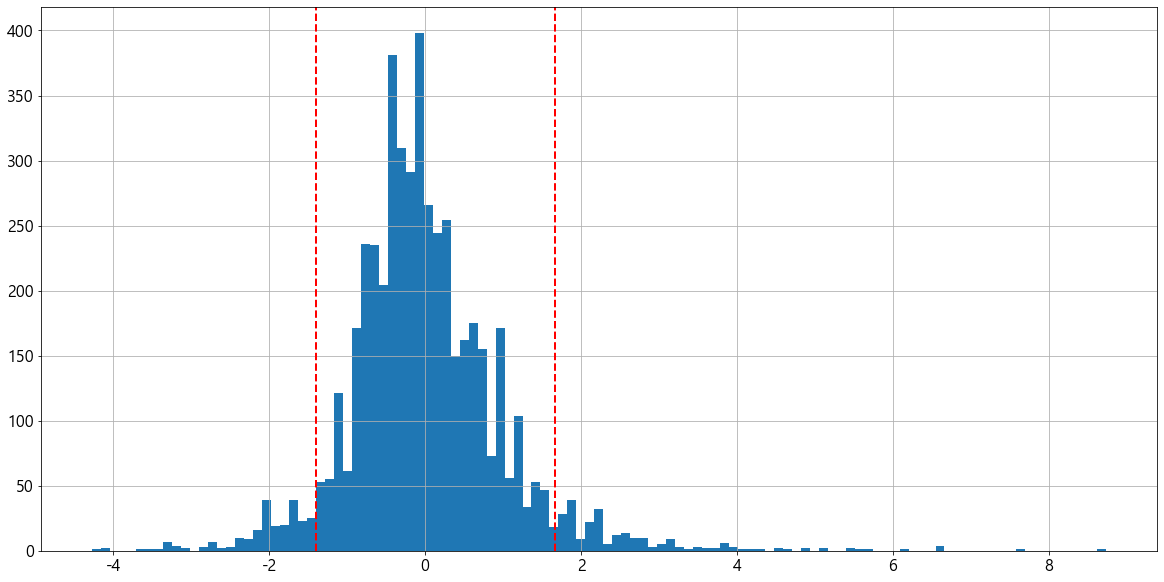

In [43]:
# z-score의 분포를 시각한다.
ax = df['price_by_group'].hist(bins='auto')

# 상위 95%, 하위 5% 위치 값을 가져온다.
lower_bound = df['price_by_group'].quantile(0.05)
upper_bound = df['price_by_group'].quantile(0.95)

# 선을 그린다
ax.axvline(x=lower_bound, color='r', linestyle='dashed', linewidth=2)
ax.axvline(x=upper_bound, color='r', linestyle='dashed', linewidth=2)

print(lower_bound)
print(upper_bound)

plt.show()

In [44]:
# lower_bound 이하면 0, upper_bound 이상이면 1, 그 중가이면 1로 설정한다.
def get_price_level(price, lower, upper) :
    if price <= lower :
        return '0'
    elif price >= upper :
        return '2'
    else :
        return '1'
    
a1 = df.groupby('phone_model_detail')['price']

# 같은 단말기 내에서 하위 5% 위치의 값을 담아준다.
df['price_lower'] = a1.transform(lambda x : x.quantile(0.05))
# 같은 단말기 내에서 상위 95% 위치의 값을 담아준다.
df['price_upper'] = a1.transform(lambda x : x.quantile(0.95))
# 하위 5%, 상위 95% 위치의 가격과 비교하여 가격 레벨을 설정해준다.
df['price_level'] = df.apply(lambda row : get_price_level(row['price'],
                                                         row['price_lower'],
                                                         row['price_upper']),
                                                          axis=1)
df[['price', 'price_lower', 'price_upper', 'price_level']]

,price,price_lower,price_upper,price_level
0,550000.0,180000.0,680000.0,1
1,380000.0,180000.0,414000.0,1
2,300000.0,150000.0,349000.0,1
3,290000.0,100000.0,500000.0,1
4,280000.0,18000.0,400000.0,1
...,...,...,...,...
4946,1300000.0,628200.0,1200000.0,2
4947,1300000.0,597000.0,1200000.0,2
4948,1300000.0,597000.0,1200000.0,2
4949,1350000.0,628200.0,1200000.0,2


### 텍스트 전처리를 위한 불용어 데이터를 불러온다.

In [45]:
import pickle
import re

# 중고나라 불용어 사전을 불러온다.
with open('data10/used_mobile_phone_stopwords.pkl', 'rb') as fp :
    stopwords = pickle.load(fp)
    
stopwords

['거래',
 '입니',
 '판매',
 '아이폰',
 '갤럭시',
 '골드',
 '팝',
 '만원',
 '폰',
 '시',
 '주세',
 '노트',
 '문자',
 '화이트',
 '연락',
 '블랙',
 '구매',
 '및',
 '기재',
 '년',
 '품',
 '월',
 '용',
 '로즈',
 '상세',
 '항목',
 '완료',
 '지역',
 '개',
 '실버',
 '신청하기',
 '색상',
 '타',
 '기기',
 '서울',
 '후',
 '문의',
 '원',
 '설명',
 '판',
 '전화',
 '엣지',
 '모두',
 '경우',
 '보시',
 '위',
 '정확히',
 '정도',
 '될',
 '등',
 '휴대폰',
 '되',
 '일',
 '플러스',
 'g',
 'lg',
 'skt',
 'gb',
 'kt',
 'sk',
 'se',
 'lgu',
 'u',
 'lte',
 'fl',
 'ltea',
 'nl',
 'k',
 'z',
 'v',
 'lgt',
 'gs',
 'gl',
 'ss',
 'cat',
 'nk',
 'b',
 'com',
 'gpro',
 'ea',
 'ns',
 'ios',
 'gt',
 'or',
 'usb',
 'amp',
 'umi',
 'lgfl',
 'es',
 'howufeel',
 'gk',
 'ek',
 'xperia',
 'y',
 'wpi',
 'mtk',
 'd',
 'www',
 'sss',
 'fs',
 'el',
 'lglp',
 'white',
 'http',
 'o',
 'l',
 'zv',
 'e',
 'al',
 'gn',
 'ps',
 'naver',
 'rome',
 'gx',
 'lglb',
 'ssanmai',
 'f',
 '계',
 '명',
 '들',
 '적',
 '자',
 '상',
 '화',
 '대',
 '중',
 '장',
 '간',
 '네',
 '분',
 '권',
 '이',
 '백',
 '째',
 '형',
 '분들',
 '번째',
 '씩',
 '쯤',
 '식',
 '조',
 '성',
 '

### 형태소 추출

In [46]:
# '+'를 제외한 모든 특수 문자를 제거하고, 숫자 형태의 문자를 제거한다.
def text_cleaning(text) :
    # text = ''.join(c for c in text if c.isalnum() or c in '+, ')
    temp_list = []
    
    for a1 in text :
        # print(a1)
        # 숫자, 알파벳, +, 쉼표, 띄어쓰기라면...
        if a1.isalnum() or a1 in '+, ' :
            # 숫자가 아니라면
            if a1.isdigit() == False :
                temp_list.append(a1)
    
    text = ''.join(temp_list)
    return text
    
from konlpy.tag import Okt
# 불용어에 등장하지 않는 형태소만 추출하여 반환한다.
def get_pos(x) :
    # 형태소 분리를 위한 라이브러리
    tagger = Okt()
    # 형태소를 분리한다.
    poses = tagger.pos(x)
    # 불용어에 포함되어 있는 것은 제외한다.
    result_list = []
    
    for a1, a2 in poses :
        if a1 not in stopwords :
            result_list.append(a1)

    return result_list


# 문자열을 전처리한다.
df['text'] = df['text'].apply(lambda x : text_cleaning(x))
# 형태소 분석 테스트
result = get_pos(df['text'][0])
result

['+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '리퍼',
 '기간',
 '만료',
 '되어서',
 '징',
 '하게',
 '되었습니다',
 '상태',
 '초',
 'a',
 '급',
 '스',
 '없습니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '리퍼',
 '기간',
 '만료',
 '되어서',
 '징',
 '하게',
 '되었습니다',
 '상태',
 '초',
 'a',
 '급',
 '스',
 '없습니다',
 '징',
 '애플',
 '라이트',
 '홈',
 '버튼',
 '링',
 '카메라',
 '링',
 '볼륨',
 '버튼',
 '슬립',
 '버튼',
 '검금',
 '심플',
 '튀지',
 '않게',
 '이쁘게',
 '했구요',
 '유심',
 '꽂고',
 '바로',
 '사용',
 '하시면',
 '됩니다',
 '사람',
 '이냐',
 '자주',
 '물어보고',
 '실제',
 '더욱',
 '이쁩니다',
 '밤',
 '영롱하게',
 '맥북',
 '뒷',
 '사과',
 '로고',
 '비춰지고',
 '요전',
 '넘어가기',
 '위해',
 '합니다',
 '가능합니다',
 '박스',
 '어머니',
 '버리시고',
 '이어폰',
 '충전기',
 '정품',
 '드립니다',
 '직거래',
 '우선',
 '순',
 '위로',
 '정',
 '싶으시면',
 '선',
 '입금',
 '택배',
 '발송',
 '해드리겠습니다',
 '믿으시면',
 '직거래',
 '하시길',
 '추천',
 '해요',
 '안전',
 '합니다',
 '서울시',
 '강남구',
 '역삼동',
 '차병원',
 '사거리',
 '근처',
 '가격']

### 빈출 형태소 3000개를 선정한다.

In [47]:
from collections import Counter

# 글 내용을 형태소 분리한 결과를 가져온다.
pos_list = df['text'].apply(lambda x : get_pos(x))
pos_list

0       [+, 애플, 라이트, 팝니다, +, 애플, 라이트, 팝니다, +, 애플, 라이트,...
1       [s, 팝니다, 직거래, s, 품명, s, 제품, 상태, 사진, 참고, 용량, 선택...
2       [s, 풀, 박스, 팝니다, 새, 상품, 급, 실기스, 없어요, 직접, 한지, 개월...
3       [티탄, 합니다, 직접, 티탄, 합니다, 월일, as, 가능하며, 이나, 상태, 좋...
4       [sony, 엑스페리아, c, ultra, 미사, 새, 제품, 팝니다, 소니, 엑스...
                              ...                        
4946    [미개, 봉, 언락폰, iphone, plus, 강북, 도봉, 언락폰, 미개, 봉,...
4947    [미국, 제트, 강남, 역삼, 미, 개봉, 언, 락, 애플, a, 강남, 역삼, 미...
4948    [미개, 봉, 홍콩, 팝니다, 케이스, 강화유리, 서비스, 종류, 다양, 제품, 미...
4949    [미개, 봉, 언락폰, iphone, plus, 강북, 도봉, 미개, 봉, 언락폰,...
4950    [팝니다, 제트, 북미판, 카메라, 무음, 국내, 리퍼, 가능, jet, black...
Name: text, Length: 4951, dtype: object

In [48]:
pos_list2 = pos_list.tolist()
# 2차원으로 구성되어 있는 문자열 리스트내의 모든 문자열을
# 다 추출해 하나의 문자열 리스트로 생성한다.
corpus = sum(pos_list2, [])
corpus

['+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '리퍼',
 '기간',
 '만료',
 '되어서',
 '징',
 '하게',
 '되었습니다',
 '상태',
 '초',
 'a',
 '급',
 '스',
 '없습니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '리퍼',
 '기간',
 '만료',
 '되어서',
 '징',
 '하게',
 '되었습니다',
 '상태',
 '초',
 'a',
 '급',
 '스',
 '없습니다',
 '징',
 '애플',
 '라이트',
 '홈',
 '버튼',
 '링',
 '카메라',
 '링',
 '볼륨',
 '버튼',
 '슬립',
 '버튼',
 '검금',
 '심플',
 '튀지',
 '않게',
 '이쁘게',
 '했구요',
 '유심',
 '꽂고',
 '바로',
 '사용',
 '하시면',
 '됩니다',
 '사람',
 '이냐',
 '자주',
 '물어보고',
 '실제',
 '더욱',
 '이쁩니다',
 '밤',
 '영롱하게',
 '맥북',
 '뒷',
 '사과',
 '로고',
 '비춰지고',
 '요전',
 '넘어가기',
 '위해',
 '합니다',
 '가능합니다',
 '박스',
 '어머니',
 '버리시고',
 '이어폰',
 '충전기',
 '정품',
 '드립니다',
 '직거래',
 '우선',
 '순',
 '위로',
 '정',
 '싶으시면',
 '선',
 '입금',
 '택배',
 '발송',
 '해드리겠습니다',
 '믿으시면',
 '직거래',
 '하시길',
 '추천',
 '해요',
 '안전',
 '합니다',
 '서울시',
 '강남구',
 '역삼동',
 '차병원',
 '사거리',
 '근처',
 '가격',
 's',
 '팝니다',
 '직거래',
 's',
 '품명',
 's',
 '제품',
 '상태',
 '사진',
 '참고',
 '용량',
 '선택',
 '약정',
 '여부',
 '가능',
 '요금',

In [49]:
# Counter를 생성한다.
counter = Counter(corpus)
counter

Counter({'+': 2443,
         '애플': 201,
         '라이트': 16,
         '팝니다': 3126,
         '리퍼': 1488,
         '기간': 760,
         '만료': 87,
         '되어서': 26,
         '징': 79,
         '하게': 93,
         '되었습니다': 141,
         '상태': 3373,
         '초': 134,
         'a': 2276,
         '급': 3487,
         '스': 1093,
         '없습니다': 1338,
         '홈': 91,
         '버튼': 235,
         '링': 16,
         '카메라': 373,
         '볼륨': 28,
         '슬립': 6,
         '검금': 2,
         '심플': 7,
         '튀지': 2,
         '않게': 18,
         '이쁘게': 5,
         '했구요': 138,
         '유심': 1219,
         '꽂고': 9,
         '바로': 677,
         '사용': 3997,
         '하시면': 422,
         '됩니다': 849,
         '사람': 38,
         '이냐': 2,
         '자주': 16,
         '물어보고': 2,
         '실제': 57,
         '더욱': 8,
         '이쁩니다': 12,
         '밤': 34,
         '영롱하게': 2,
         '맥북': 2,
         '뒷': 377,
         '사과': 2,
         '로고': 14,
         '비춰지고': 2,
         '요전': 10,
         '넘어가기': 2,
 

In [50]:
# 상위 3000개 를 가져온다.
a1 = counter.most_common(3000)
a1

[('입니다', 6342),
 ('직거래', 5015),
 ('s', 4877),
 ('합니다', 4681),
 ('택배', 4276),
 ('사용', 3997),
 ('급', 3487),
 ('상태', 3373),
 ('팝니다', 3126),
 ('가능합니다', 2798),
 ('정상', 2769),
 ('사진', 2614),
 ('가격', 2542),
 ('+', 2443),
 ('케이스', 2314),
 ('a', 2276),
 ('주세요', 2229),
 ('해지', 2212),
 ('삭제', 2201),
 ('제품', 2198),
 ('있습니다', 2196),
 ('박스', 2123),
 ('가능', 2088),
 ('직접', 1954),
 ('액정', 1909),
 ('배터리', 1897),
 ('성품', 1783),
 ('필름', 1626),
 ('리퍼', 1488),
 ('충전기', 1371),
 ('없습니다', 1338),
 ('풀', 1273),
 ('개통', 1235),
 ('유심', 1219),
 ('즈', 1199),
 ('안전', 1146),
 ('스', 1093),
 ('하기', 1069),
 ('신청', 1052),
 ('드립니다', 1027),
 ('통신사', 1016),
 ('구입', 1012),
 ('약정', 1003),
 ('이어폰', 991),
 ('공기', 972),
 ('새', 968),
 ('기변', 962),
 ('포함', 953),
 ('모델', 953),
 ('선택', 908),
 ('됩니다', 849),
 ('확인', 799),
 ('기간', 760),
 ('기스', 731),
 ('그레이', 720),
 ('찍힘', 690),
 ('방법', 683),
 ('바로', 677),
 ('할인', 673),
 ('제', 663),
 ('시기', 642),
 ('스페이스', 636),
 ('희망', 632),
 ('번호', 632),
 ('중고나라', 624),
 ('본체', 622),
 ('같이', 621),
 ('

In [51]:
# 가장 많이 나온 3000개 단어만 추출한다.
# common_words = [key for key, _ in a1]
common_words = []

for key, _ in a1 :
    common_words.append(key)
    
common_words

['입니다',
 '직거래',
 's',
 '합니다',
 '택배',
 '사용',
 '급',
 '상태',
 '팝니다',
 '가능합니다',
 '정상',
 '사진',
 '가격',
 '+',
 '케이스',
 'a',
 '주세요',
 '해지',
 '삭제',
 '제품',
 '있습니다',
 '박스',
 '가능',
 '직접',
 '액정',
 '배터리',
 '성품',
 '필름',
 '리퍼',
 '충전기',
 '없습니다',
 '풀',
 '개통',
 '유심',
 '즈',
 '안전',
 '스',
 '하기',
 '신청',
 '드립니다',
 '통신사',
 '구입',
 '약정',
 '이어폰',
 '공기',
 '새',
 '기변',
 '포함',
 '모델',
 '선택',
 '됩니다',
 '확인',
 '기간',
 '기스',
 '그레이',
 '찍힘',
 '방법',
 '바로',
 '할인',
 '제',
 '시기',
 '스페이스',
 '희망',
 '번호',
 '중고나라',
 '본체',
 '같이',
 '생활',
 '잘',
 '무',
 '퀵',
 '글',
 '된',
 '않을',
 '공식',
 '앱',
 '확정',
 '기능',
 '다운',
 '양',
 '호환',
 '케이블',
 '받기',
 '미',
 '이메일',
 '작성',
 '부분',
 '금지',
 '될수',
 '식아이디',
 '허위',
 '임의',
 '통보',
 '채우지',
 '핸드폰',
 '편한',
 '전혀',
 '충전',
 '내용',
 '연락처',
 '단말기',
 '부산',
 '대구',
 '미사',
 '정품',
 '중고',
 '문제',
 '없이',
 '이상',
 '보호',
 '방문',
 '없는',
 '외관',
 '외',
 '인천',
 '깨끗합니다',
 'x',
 '초기',
 '하나',
 '참고',
 '이구',
 '요금',
 '개월',
 '이나',
 '사이트',
 '팔아요',
 '하시면',
 '했습니다',
 '동',
 '카페',
 '보내',
 '카톡',
 '블로그',
 '링크',
 '싸이',
 '강퇴',
 '삼성',
 '거치',
 '있는',
 '호선'

### TF-IDF 벡터(단어사전) 생성

In [52]:
df['price_level'].value_counts()

1    4296
0     334
2     321
Name: price_level, dtype: int64

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
# 빈출 형태소를 제외한 모든 형태소를 제거하는 함수를 만든다.
def get_common_pos(x) :
    tagger = Okt()
    poses = tagger.pos(x)
    
    pos_list = []
    
    for a1, _ in poses :
        if a1 in common_words :
            pos_list.append(a1)
    
    return pos_list

In [55]:
# 1:3:1 비율로 샘플링한다.
# negative_random = df[df['price_level'] == '0'].sample(321, random_state=1)
# neutral_random = df[df['price_level'] == '1'].sample(321 * 3, random_state=1)
# positive_random = df[df['price_level'] == '2'].sample(321, random_state=1)

In [56]:
# 샘플링 완료된 데이터셋을 정의한다.
# df_sample = negative_random.append(neutral_random).append(positive_random)

In [57]:
# 단어당 몇개씩 들어 있는지에 대한 벡터를 생성한다.
index_vectorizer = CountVectorizer(tokenizer= lambda x : get_common_pos(x))
X = index_vectorizer.fit_transform(df['text'].tolist())

In [58]:
# TF-IDF 벡터를 생성한다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

In [59]:
# 감성 분류를 위한 학습 데이터셋을 생성한다.
y = df['price_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### price_level 예측

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [61]:
# model = RandomForestClassifier()
# model = XGBClassifier(silent=True, verbosity=0, tree_method='gpu_hist')
vector_model = SVC(kernel='rbf', C=10.0, random_state=1, gamma=0.10)
vector_model.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1, random_state=1)

In [62]:
y_pred = vector_model.predict(X_test)
y_pred

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1

In [63]:
accuracy_score(y_test, y_pred)

0.8910191725529768

In [64]:
test_data = [
    '새로산 폰인데 팝니다',
    '상태 매우 좋은 아이폰 입니다',
    '갤럭시인데 액정이 깨졌어요',
    '미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus',
    '갤럭시s6 풀박스로 팝니다~~~',
    '미개봉'
]

X = index_vectorizer.transform(test_data)
X = tfidf_vectorizer.transform(X)

y_pred = vector_model.predict(X)
y_pred

array(['1', '1', '1', '2', '1', '2'], dtype=object)

### 중고폰 거래가 예측

In [65]:
# text 특성으로 부터 상품 상태 특성을 생성한다.
X = index_vectorizer.transform(df['text'].tolist())
X = tfidf_vectorizer.transform(X)

# 예측 결과를 가져온다.
y_pred = vector_model.predict(X)

df['product_status'] = pd.Series(y_pred)
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,create_time_score,phone_model_storage,phone_model_detail,price_by_group,price_lower,price_upper,price_level,product_status
0,2017-03-19 4 35 00 PM,550000.0,아이폰플러스 블랙+애플라이트 기가 팝니다 아이폰플러스 블랙+애플라이트 기가 팝니다...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,0.985612,64gb,iphone 6,0.910563,180000.0,680000.0,1,1
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s엣지 기가 팝니다 직거래 갤럭시s엣지 기가 품명 갤럭시s엣지제품 단품상태 ...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,0.640288,32gb,galaxy s6 edge,1.003699,180000.0,414000.0,1,1
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s 풀박스로 팝니다 새상품급 실기스조차 없어요 직접거래 구매한지 개월만에 ...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,0.637890,32gb,galaxy s6,0.669017,150000.0,349000.0,1,1
3,2017-03-23 11 14 00 PM,290000.0,sk g 티탄 폰 단품판매합니다 직접거래 sk g 티탄 폰 단품판매합니다 올 월...,lg g5 32gb,836000,lg,95.96,1.490195e+09,0.995204,32gb,lg g5,-0.330426,100000.0,500000.0,1,1
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c ultra e gb 미사용 새제품 팝니다 소니 엑스페리...,lg u 32gb,396000,lg,102.59,1.460300e+09,0.165468,32gb,lg u,1.014392,18000.0,400000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰플러스 gb 골드 iphone plus 강북 도봉 언락폰 미개봉...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,0.601918,256gb,iphone 7 plus,2.038137,628200.0,1200000.0,2,2
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰 g 제트블랙 강남역삼 대 미개봉언락 애플 a 강남역삼 미국판 아이폰 ...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,0.635492,256gb,iphone 7,2.216613,597000.0,1200000.0,2,2
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰 , 구매한제품 ...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,0.551559,256gb,iphone 7,2.216613,597000.0,1200000.0,2,2
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰플러스 gb 골드 iphone plus 강북 도봉 미개봉 언락폰...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,0.589928,256gb,iphone 7 plus,2.261922,628200.0,1200000.0,2,2


In [66]:
accuracy_score(df['price_level'], df['product_status'])

0.9353665926075541

In [67]:
# 학습을 위한 데이터를 준비한다.
df = df[['price', 'factory_price', 'maker', 'price_index', 'create_time_score',
         'phone_model_storage', 'phone_model_detail', 'product_status']]
df

,price,factory_price,maker,price_index,create_time_score,phone_model_storage,phone_model_detail,product_status
0,550000.0,924000,apple,95.96,0.985612,64gb,iphone 6,1
1,380000.0,979000,samsung,103.05,0.640288,32gb,galaxy s6 edge,1
2,300000.0,854000,samsung,103.05,0.637890,32gb,galaxy s6,1
3,290000.0,836000,lg,95.96,0.995204,32gb,lg g5,1
4,280000.0,396000,lg,102.59,0.165468,32gb,lg u,1
...,...,...,...,...,...,...,...,...
4946,1300000.0,1283700,apple,103.05,0.601918,256gb,iphone 7 plus,2
4947,1300000.0,1130800,apple,103.05,0.635492,256gb,iphone 7,2
4948,1300000.0,1130800,apple,103.05,0.551559,256gb,iphone 7,2
4949,1350000.0,1283700,apple,103.05,0.589928,256gb,iphone 7 plus,2


In [68]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

encoder1.fit(df['maker'])
encoder2.fit(df['phone_model_storage'])
encoder3.fit(df['phone_model_detail'])
encoder4.fit(df['product_status'])

df['maker'] = encoder1.transform(df['maker'])
df['phone_model_storage'] = encoder2.transform(df['phone_model_storage'])
df['phone_model_detail'] = encoder3.transform(df['phone_model_detail'])
df['product_status'] = encoder4.transform(df['product_status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                4951 non-null   float64
 1   factory_price        4951 non-null   int64  
 2   maker                4951 non-null   int32  
 3   price_index          4951 non-null   float64
 4   create_time_score    4951 non-null   float64
 5   phone_model_storage  4951 non-null   int32  
 6   phone_model_detail   4951 non-null   int32  
 7   product_status       4951 non-null   int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 232.2 KB


In [69]:
df

,price,factory_price,maker,price_index,create_time_score,phone_model_storage,phone_model_detail,product_status
0,550000.0,924000,0,95.96,0.985612,5,27,1
1,380000.0,979000,4,103.05,0.640288,3,19,1
2,300000.0,854000,4,103.05,0.637890,3,18,1
3,290000.0,836000,2,95.96,0.995204,3,33,1
4,280000.0,396000,2,102.59,0.165468,3,34,1
...,...,...,...,...,...,...,...,...
4946,1300000.0,1283700,0,103.05,0.601918,2,30,2
4947,1300000.0,1130800,0,103.05,0.635492,2,29,2
4948,1300000.0,1130800,0,103.05,0.551559,2,29,2
4949,1350000.0,1283700,0,103.05,0.589928,2,30,2


In [70]:
# 입력과 결과로 나눈다.
X = df.drop('price', axis=1)
y = df['price']

display(X)
display(y)

,factory_price,maker,price_index,create_time_score,phone_model_storage,phone_model_detail,product_status
0,924000,0,95.96,0.985612,5,27,1
1,979000,4,103.05,0.640288,3,19,1
2,854000,4,103.05,0.637890,3,18,1
3,836000,2,95.96,0.995204,3,33,1
4,396000,2,102.59,0.165468,3,34,1
...,...,...,...,...,...,...,...
4946,1283700,0,103.05,0.601918,2,30,2
4947,1130800,0,103.05,0.635492,2,29,2
4948,1130800,0,103.05,0.551559,2,29,2
4949,1283700,0,103.05,0.589928,2,30,2


0        550000.0
1        380000.0
2        300000.0
3        290000.0
4        280000.0
          ...    
4946    1300000.0
4947    1300000.0
4948    1300000.0
4949    1350000.0
4950    1500000.0
Name: price, Length: 4951, dtype: float64

In [71]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[ 0.44267769, -0.9270284 , -1.52702709, ...,  1.11572406,
         0.42162684,  0.00365979],
       [ 0.71882252,  1.19024417,  0.65781394, ..., -0.08396099,
        -0.404278  ,  0.00365979],
       [ 0.09122063,  1.19024417,  0.65781394, ..., -0.08396099,
        -0.50751611,  0.00365979],
       ...,
       [ 1.48098225, -0.9270284 ,  0.65781394, ..., -0.68380352,
         0.62810305,  3.62758058],
       [ 2.24866487, -0.9270284 ,  0.65781394, ..., -0.68380352,
         0.73134116,  3.62758058],
       [ 0.81923882, -0.9270284 ,  0.65781394, ..., -1.88348857,
         0.62810305,  0.00365979]])

In [72]:
# 학습과 검증으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y
                                        , test_size=0.3, random_state=1)

In [73]:
# 하이퍼 파라미터 튜닝
# 폴드 생성
kfold = KFold(n_splits=20, shuffle=True, random_state=1)

# 하이퍼 파라미터 튜닝
params = {
    # 트리의 개수
    'n_estimators' : [10, 50, 100, 150, 200],
    # 질문 깊이
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# 모델 생성
model = XGBRegressor(silent=True, verbosity=0, tree_method='gpu_hist')

# 하이퍼파라미터 튜닝
grid = GridSearchCV(model, param_grid=params, scoring='r2', cv=kfold)
grid.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
print(f'최적의 모델 평균 성능 : {grid.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 10}
최적의 모델 평균 성능 : 0.7582758738039362


In [74]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 추출한다.
best_model = grid.best_estimator_
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
             subsample=1, tree_method='gpu_hist', validate_parameters=1,
             verbosity=0)

In [75]:
# 교차검증
result = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=kfold)
result

array([0.72383918, 0.70684335, 0.83298276, 0.83464376, 0.8223688 ,
       0.76251996, 0.80395405, 0.75296719, 0.67773102, 0.6653501 ,
       0.7483853 , 0.79051856, 0.70542552, 0.73802193, 0.77289309,
       0.86043373, 0.80309453, 0.70113969, 0.75303013, 0.7093748 ])

In [76]:
# 예측 결과를 추출해서 평가한다.
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [77]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

8892054214.881332
11487057662.924215
0.812741371198788
0.7505824742440701


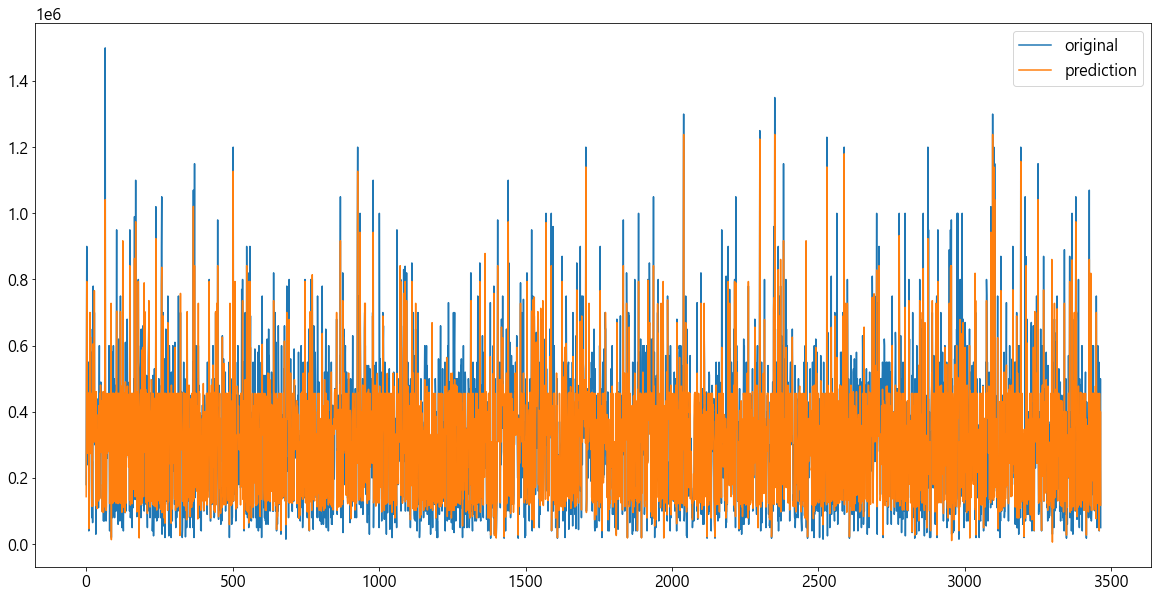

In [78]:
plt.plot(y_train.values, label='original')
plt.plot(y_train_pred, label='prediction')
plt.legend()
plt.show()

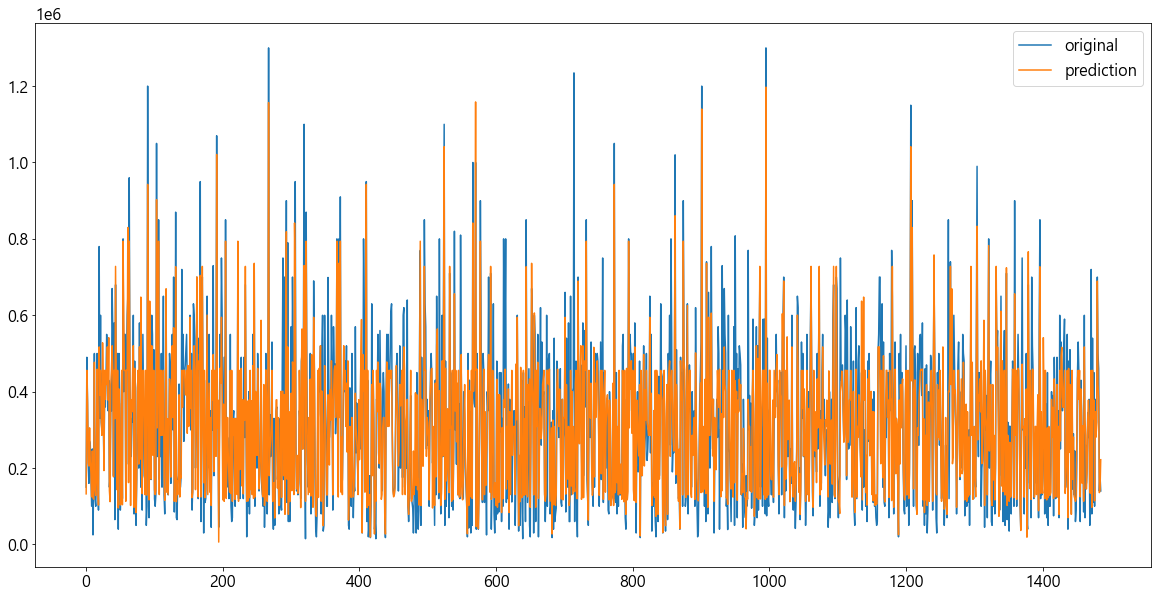

In [79]:
plt.plot(y_test.values, label='original')
plt.plot(y_test_pred, label='prediction')
plt.legend()
plt.show()

In [80]:
df

,price,factory_price,maker,price_index,create_time_score,phone_model_storage,phone_model_detail,product_status
0,550000.0,924000,0,95.96,0.985612,5,27,1
1,380000.0,979000,4,103.05,0.640288,3,19,1
2,300000.0,854000,4,103.05,0.637890,3,18,1
3,290000.0,836000,2,95.96,0.995204,3,33,1
4,280000.0,396000,2,102.59,0.165468,3,34,1
...,...,...,...,...,...,...,...,...
4946,1300000.0,1283700,0,103.05,0.601918,2,30,2
4947,1300000.0,1130800,0,103.05,0.635492,2,29,2
4948,1300000.0,1130800,0,103.05,0.551559,2,29,2
4949,1350000.0,1283700,0,103.05,0.589928,2,30,2


### 가격 예측

In [81]:
factory_price = 1300000
maker = 'apple'
price_index = 95.68
create_time_score = 1
phone_model_storage = '128gb'
phone_model_detail = 'iphone 7 plus'
# text = '아이폰 7 플러스 스페이스 그레이 128기가 모델 팝니다. ' \
#      + '메인보드 세척 완료 한 침수 폰 입니다. 폰 안켜지는 상태이구요. ' \
#      + '고쳐서 쓰실분 가져가세요' \
#      + '리퍼한지 얼마안되서 기스 이런거 하나도 없습니다' \
#      + '서울 강남 근처 직거래가 가능하고 택배도 가능합니다'

# text = '아이폰 7 플러스 스페이스 그레이 128기가 모델 팝니다. ' \
#      + '상태 매우 양호합니다.' \
#      + '기스 없으며 보증 기간 1년 남아 있습니다'

text = '아이폰 7 플러스 스페이스 그레이 128기가 미개봉 팝니다'

In [82]:
# 인코딩
maker = encoder1.transform([maker])
phone_model_storage = encoder2.transform([phone_model_storage])
phone_model_detail = encoder3.transform([phone_model_detail])

print(maker)
print(phone_model_storage)
print(phone_model_detail)

[0]
[0]
[30]


In [83]:
# 문장을 통해 가격 레벨을 예측한다.
a1 = index_vectorizer.transform([text])
a2 = tfidf_vectorizer.transform(a1)

product_status = vector_model.predict(a2)
product_status = encoder4.transform(product_status)

In [84]:
print(factory_price)
print(maker)
print(price_index)
print(create_time_score)
print(phone_model_storage)
print(phone_model_detail)
print(product_status)

1300000
[0]
95.68
1
[0]
[30]
[2]


In [85]:
data_dict = {
    'factory_price' : [factory_price],
    'maker' : maker,
    'price_index' : [price_index],
    'create_time_score' : [create_time_score],
    'phone_model_storage' : phone_model_storage,
    'phone_model_detail' : phone_model_detail,
    'product_status' : product_status
}

data_df = pd.DataFrame(data_dict)
data_df

,factory_price,maker,price_index,create_time_score,phone_model_storage,phone_model_detail,product_status
0,1300000,0,95.68,1,0,30,2


In [86]:
X = scaler1.transform(data_df)
X

array([[ 2.33050415, -0.9270284 , -1.61331136,  1.42936871, -1.88348857,
         0.73134116,  3.62758058]])

In [87]:
# 가격 예측
y_pred = best_model.predict(X)
y_pred

array([1087612.9], dtype=float32)